<ipython-input-3-e5817854fc9b>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range(start="2023-01-01", periods=100, freq="H"),


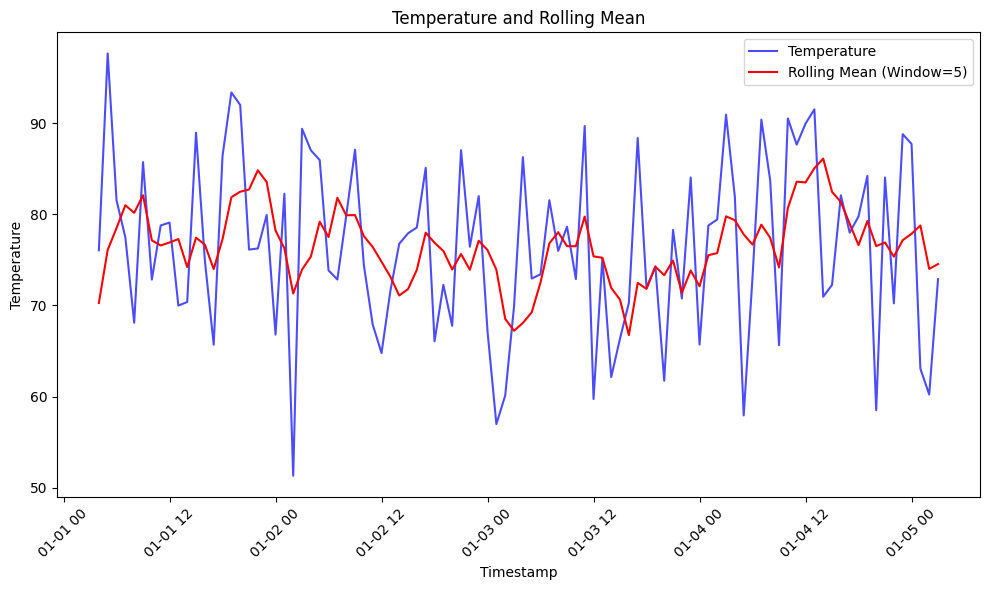

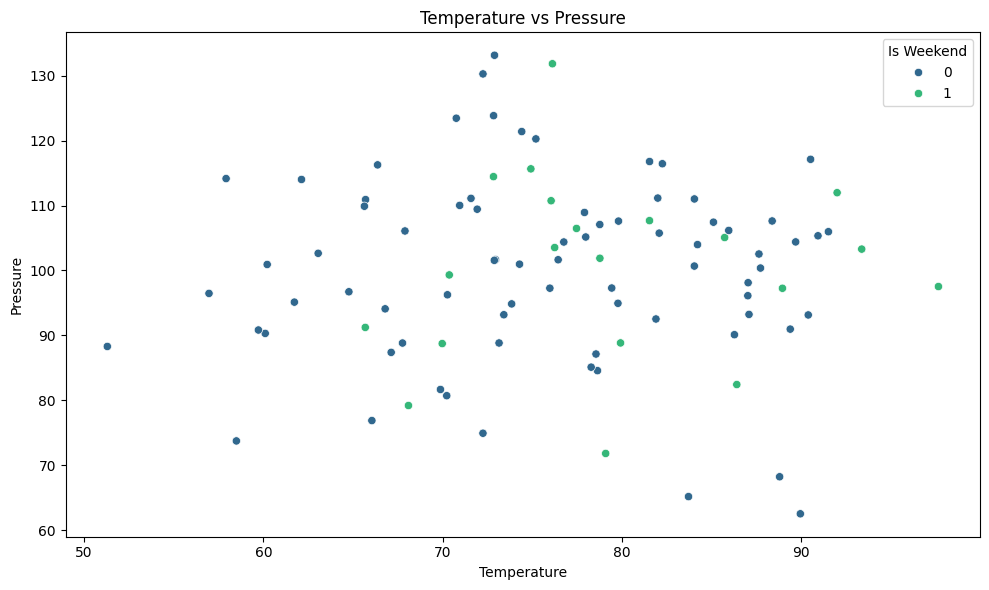

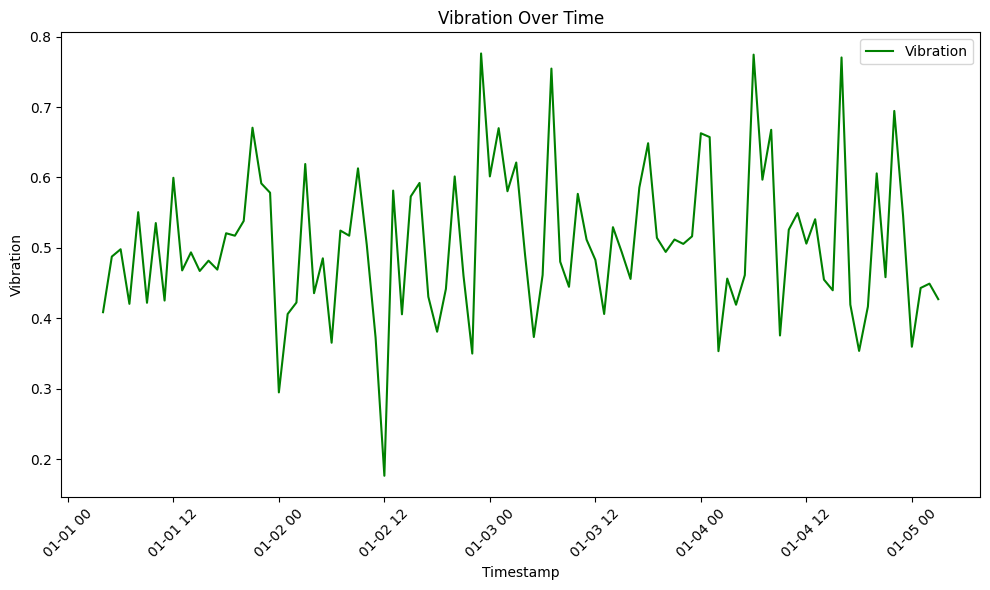

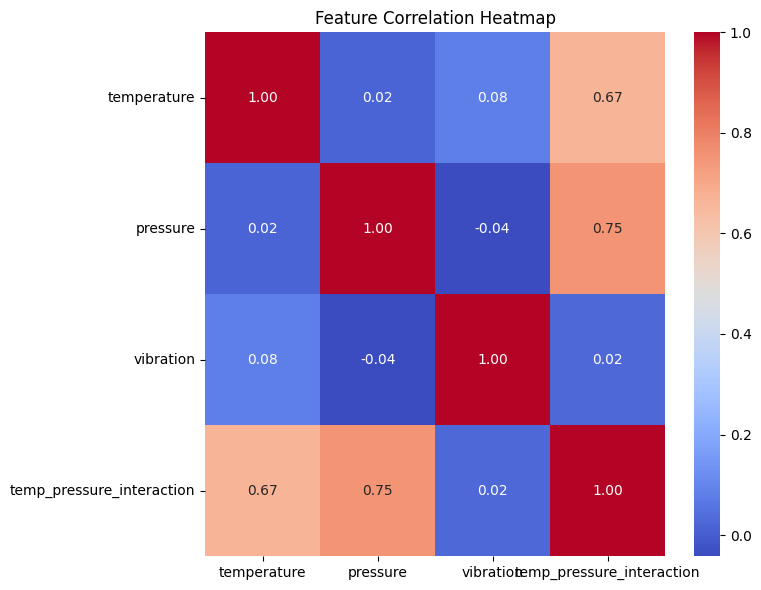

Feature engineering complete. Processed data saved to 'equipment_failure_features.csv'.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample input data for illustration
data = {
    "timestamp": pd.date_range(start="2023-01-01", periods=100, freq="H"),
    "temperature": np.random.normal(75, 10, 100),
    "pressure": np.random.normal(100, 15, 100),
    "vibration": np.random.normal(0.5, 0.1, 100),
}
df = pd.DataFrame(data)

# Convert timestamp to datetime (if not already)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Feature Engineering
# 1. Time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday  # Monday=0, Sunday=6
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# 2. Rolling statistics (window size = 5 for this example)
df['temp_mean_rolling_5'] = df['temperature'].rolling(window=5).mean()
df['temp_std_rolling_5'] = df['temperature'].rolling(window=5).std()
df['pressure_mean_rolling_5'] = df['pressure'].rolling(window=5).mean()
df['pressure_std_rolling_5'] = df['pressure'].rolling(window=5).std()

# 3. Lag features
df['temp_lag_1'] = df['temperature'].shift(1)
df['pressure_lag_1'] = df['pressure'].shift(1)
df['vibration_lag_1'] = df['vibration'].shift(1)

# 4. Interaction features
df['temp_pressure_interaction'] = df['temperature'] * df['pressure']

# Drop NaN values generated from rolling statistics and lag features
df = df.dropna()

# Save the DataFrame with new features to a CSV
df.to_csv("equipment_failure_features.csv", index=False)

# Visualizations

# 1. Line plot for temperature and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature', color='blue', alpha=0.7)
plt.plot(df['timestamp'], df['temp_mean_rolling_5'], label='Rolling Mean (Window=5)', color='red')
plt.title('Temperature and Rolling Mean')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Scatter plot for temperature vs pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temperature'], y=df['pressure'], hue=df['is_weekend'], palette='viridis')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(title='Is Weekend', loc='upper right')
plt.tight_layout()
plt.show()

# 3. Line plot for vibration over time
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['vibration'], label='Vibration', color='green')
plt.title('Vibration Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Vibration')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Heatmap for correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['temperature', 'pressure', 'vibration', 'temp_pressure_interaction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("Feature engineering complete. Processed data saved to 'equipment_failure_features.csv'.")
